# Course Project 01: Classification with Custom Dataset & Model Exploration

#### Name: Nguyen Mai Dinh, Le (Demi, Le)
#### ID: 300312139

## Part 1: Dataset Selection and Exploration – 20%

### 1.2. Import dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

pd.set_option('display.max_columns', None)

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
X = aids_clinical_trials_group_study_175.data.features 
y = aids_clinical_trials_group_study_175.data.targets 

In [3]:
df_features = pd.DataFrame(X)
df_target = pd.DataFrame(y)

aids_df = pd.concat([df_features, df_target], axis=1)
aids_df

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,zprior,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
0,948,2,48,89.8128,0,0,0,100,0,0,1,0,0,0,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,1,895,0,0,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,1,707,0,1,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,1,1399,0,1,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,1,1352,0,1,1,3,0,0,0,504,353,870,782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,1091,3,21,53.2980,1,0,0,100,0,1,1,842,0,1,1,3,0,1,1,152,109,561,720,0
2135,395,0,17,102.9672,1,0,0,100,0,1,1,417,1,1,1,3,0,0,1,373,218,1759,1030,0
2136,1104,2,53,69.8544,1,1,0,90,0,1,1,753,1,1,1,3,0,1,0,419,364,1391,1041,0
2137,465,0,14,60.0000,1,0,0,100,0,0,1,0,0,1,0,1,0,0,0,166,169,999,1838,1


### 1.2. Explain your dataset choice

#### 1.2.a. Attach the link and a screenshot (like the sample below) of the dataset you chose in your ipynb from one of the resources.

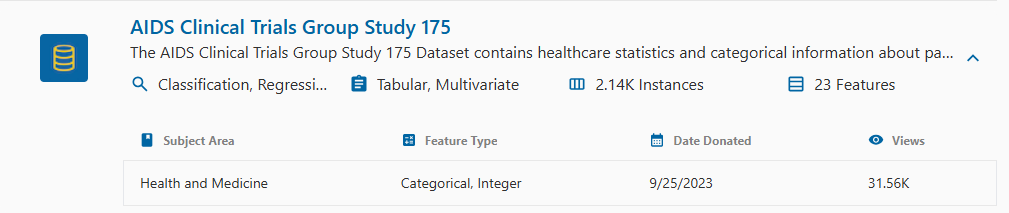

Source: https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175

#### 1.2.b. A short description, including the targeted values (classes) and features.

This is a dataset from the medical industry that contains data of patients diagnosed with HIV/AIDS who are participating in a study with the goal of observing whether or not each patient died within a certain observation time. The purpose is to examine the performance of two different types of AIDS treatments (with ZDV treatments  and no ZDV treatments)

* Target values: cid - censoring indicator (1 = Death (Patient died within observation time), 0 = Censored (Patient did not die within observation time). **Note: Censored does not mean survival after observation time but can be due to external factors such as the patient stopping the study halfway, accidents, etc. Therefore, outliers may still exist.**
* Features overview:
  + Time (observation time)
  + Personal information (age, weight, race, gender, sexual activity)
  + Medical history (hemophilia (blood clotting disorder), history of IV drug use (drugs injected directly into the vein), Karnofsky score (health index (90-100 meaning normal)))
  + Treatment history (whether or not the patient has been treated with ZDV before)
  + Lab results: counts of two types of immune cells during treatment:
    - CD4: Helper T cells -> The lower the CD4 count, the greater the immune deficiency.
    - CD8: Cytotoxic T cells -> In HIV-infected individuals, CD4 count decreases, and CD8 can increase as a compensatory response to the CD4 deficiency. This results in the CD4:CD8 ratio being potentially low.

In [4]:
aids_clinical_trials_group_study_175.variables

,name,role,type,demographic,description,units,missing_values
0,pidnum,ID,Integer,None,Patient ID,None,no
1,cid,Target,Binary,None,"censoring indicator (1 = failure, 0 = censoring)",None,no
2,time,Feature,Integer,None,time to failure or censoring,None,no
3,trt,Feature,Integer,None,treatment indicator (0 = ZDV only; 1 = ZDV + d...,None,no
4,age,Feature,Integer,Age,age (yrs) at baseline,None,no
5,wtkg,Feature,Continuous,None,weight (kg) at baseline,None,no
6,hemo,Feature,Binary,None,"hemophilia (0=no, 1=yes)",None,no
7,homo,Feature,Binary,Sexual Orientation,"homosexual activity (0=no, 1=yes)",None,no
8,drugs,Feature,Binary,None,"history of IV drug use (0=no, 1=yes)",None,no
9,karnof,Feature,Integer,None,Karnofsky score (on a scale of 0-100),None,no


#### 1.2.c. How do you know if it’s an imbalanced dataset?

By counting the ratio of values for each class in the target feature:

* Class 0 - Censored: Over 75%
* Class 1 - Death: Over 24%

In [5]:
aids_df['cid'].value_counts(normalize=True) * 100

cid
0    75.642824
1    24.357176
Name: proportion, dtype: float64

#### 1.2.d. Why you chose this dataset?

Before choosing the dataset, I listed 3 criteria that the dataset should meet:

1. **Imbalanced dataset** - as shown above.
2. **The target feature has a good correlation with at least one feature in the dataset** (To ensure that there is some meaningful relationship between the target variable and one or more features. A good correlation means that the predictions more reliable.)
3. **There are at least two features that are correlated with each other** (This is to ensure the possibility of finding new feature indices that summarize the results of other features, potentially uncovering additional insights or improving model accuracy by reducing dimensionality)
4. **At least 500 rows** (to ensure model performance has generalizability. A larger number of rows provides a more representative sample of the population, which leads to better generalization of the model to unseen data.)

**<u><span style="color:gray;">Correlation Detection</span></u>**

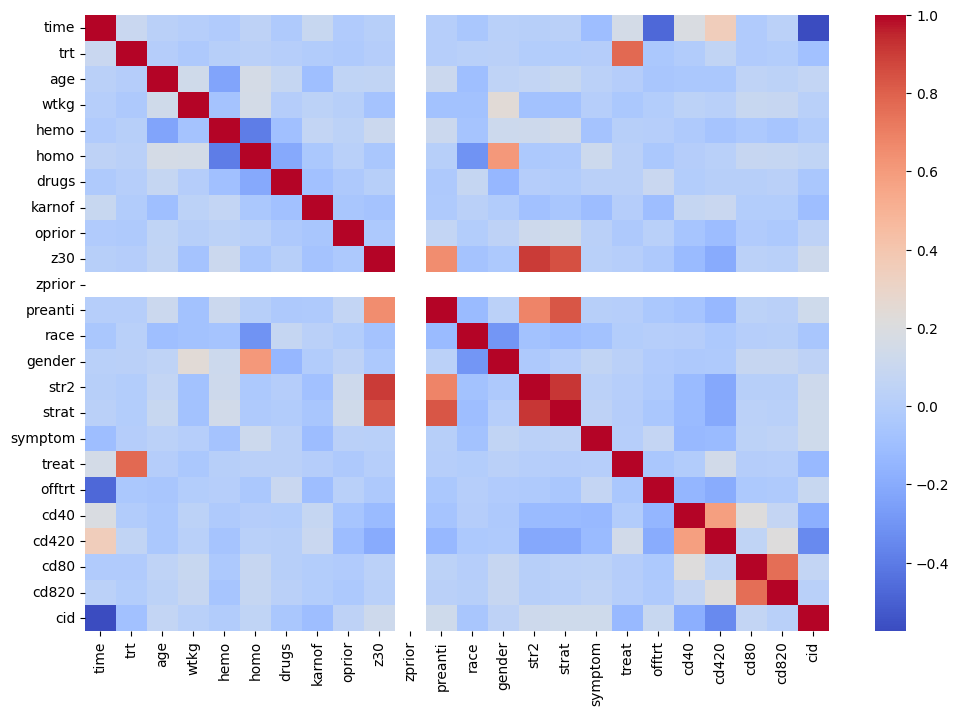

In [6]:
# Calculate correlation matrix
corr = aids_df.corr()

# Filter correlation values to only show those greater than 0.5 or less than -0.5
filtered_corr = corr[(corr > 0.3) | (corr < -0.3)]

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm')
plt.show()

**Observation**:

1. ✅ The target value ratio indicates that it is an imbalanced dataset.
2. ✅ Time has a negative correlation with cid.
3. ✅ Other features, such as treatment indicators, z30, preanti, strat, cd4, and cd8, also show a good correlation, suggesting that this dataset has potential for prediction.
4. ✅ The info() method shows that the dataset has over 2000 rows (more than 500 rows), which is sufficient for building reliable models.

### 1.3. Explore Data – 80%

**<u><span style="color:gray;">Summary Statistics</span></u>**

* describe(): This method summarizes general statistics for each column, helping to detect outliers, inconsistencies, or invalid scales.
* info(): This method checks for missing values and ensures the columns have valid data types.
* duplicated(): This method identifies duplicate rows in the dataset to avoid redundant data.

***Purpose: to avoid misleading, redundancy and bias in analysis***

In [7]:
aids_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     2139 non-null   int64  
 1   trt      2139 non-null   int64  
 2   age      2139 non-null   int64  
 3   wtkg     2139 non-null   float64
 4   hemo     2139 non-null   int64  
 5   homo     2139 non-null   int64  
 6   drugs    2139 non-null   int64  
 7   karnof   2139 non-null   int64  
 8   oprior   2139 non-null   int64  
 9   z30      2139 non-null   int64  
 10  zprior   2139 non-null   int64  
 11  preanti  2139 non-null   int64  
 12  race     2139 non-null   int64  
 13  gender   2139 non-null   int64  
 14  str2     2139 non-null   int64  
 15  strat    2139 non-null   int64  
 16  symptom  2139 non-null   int64  
 17  treat    2139 non-null   int64  
 18  offtrt   2139 non-null   int64  
 19  cd40     2139 non-null   int64  
 20  cd420    2139 non-null   int64  
 21  cd80     2139 

In [8]:
non_duplicates_count = aids_df.duplicated().value_counts()[False]
print("Number of non-duplicated values:", non_duplicates_count)

Number of non-duplicated values: 2139


In [9]:
aids_df.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,zprior,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.0,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,1.0,379.175783,0.288453,0.827957,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,0.243572
std,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,0.0,468.657526,0.453149,0.377506,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,0.429338
min,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,1.0,142.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,1.0,739.500000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,0.000000
max,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.0,2851.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


**Observation**:

* No missing values or duplicated values
* No incorrect scale
* The continuous features have means and medians that are quite close to each other, except for "Preanti," where there is a significant difference between the mean (379) and median (142) — this suggests the ***possible presence of outliers*** that may skew this column.
* Usually, individuals with HIV have CD4 counts around 200-500 cells/mm³, but the columns cd40 and cd420 have maximum values of 1199 — indicating the ***potential existence of outliers***.
(Reference: https://www.aidsmap.com/about-hiv/cd4-cell-counts#:~:text=The%20CD4%20cell%20count%20of,risk%20of%20developing%20serious%20illnesses.)

**<u><span style="color:gray;">Mean Differences Between 2 classes</span></u>**

Checking the mean of all features for both classes provides an overview of the changes and differences between the two classes, helping to gain a better understanding of potential features for classification.

In [10]:
aids_df.groupby("cid").mean()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,zprior,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
cid,,,,,,,,,,,,,,,,,,,,,,,
0,974.438813,1.574784,34.900494,75.003379,0.085909,0.646477,0.140915,95.7911,0.018541,0.514833,1.0,345.022868,0.302843,0.818294,0.551298,1.912855,0.145241,0.783066,0.337454,362.989493,399.690358,968.827565,930.448702
1,583.011516,1.353167,36.328215,75.503977,0.078695,0.706334,0.101727,94.3762,0.032630,0.660269,1.0,485.239923,0.243762,0.857965,0.692898,2.188100,0.259117,0.652591,0.441459,311.717850,283.161228,1041.905950,950.652591


**Observation**:

* The mean values of "Time" and "Preanti" differ between class 1 and class 2, making them potential features for the model.
* The number of CD4 and CD8 cells shows a noticeable change between baseline and 20 days after treatment, which could influence class classification.

**<u><span style="color:gray;">Visualization</span></u>**

***Scatterplot***

Scatterplot is used to provide a general overview of the separation between the two classes of cid, which helps in understanding patterns and potential boundaries for classification.

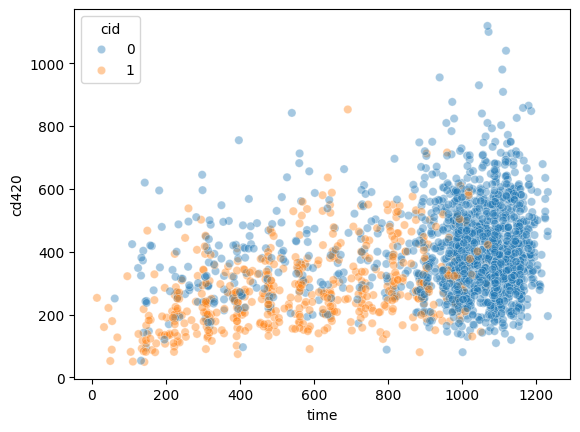

In [11]:
sns.scatterplot(data=aids_df, x="time", y="cd420", hue="cid", alpha=0.4,legend=True)
plt.show()

**Observation:**

It can be observed that the two classes, cid 0 and 1, are divided between the time range of 900 to 1000 days. We can interpret this as the treatment period during which the changes in the indices for both classes are monitored. This range is consistent with the information from the original study by Hammer et al. (1996): https://sci-hub.se/https://pubmed.ncbi.nlm.nih.gov/8813038/ với median duration là khoảng 135 - 147 weeks.

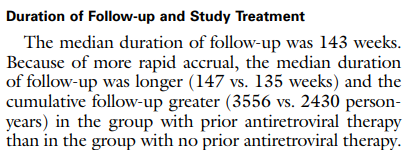

However, there are still some data points with cd = 0 that have a time to censoring under the observation time. This means that these datapoints are marked as censored not because they survived after the observation time, but because the researchers do not have information about their survival status after the observation time (due to voluntary withdrawal, accidents, psychological reasons, etc.), and these could all be considered outliers.

***Boxplots***

Boxplots are used to get an overview of the range and distribution of continuous data, allowing for the detection of potential outliers in the dataset.

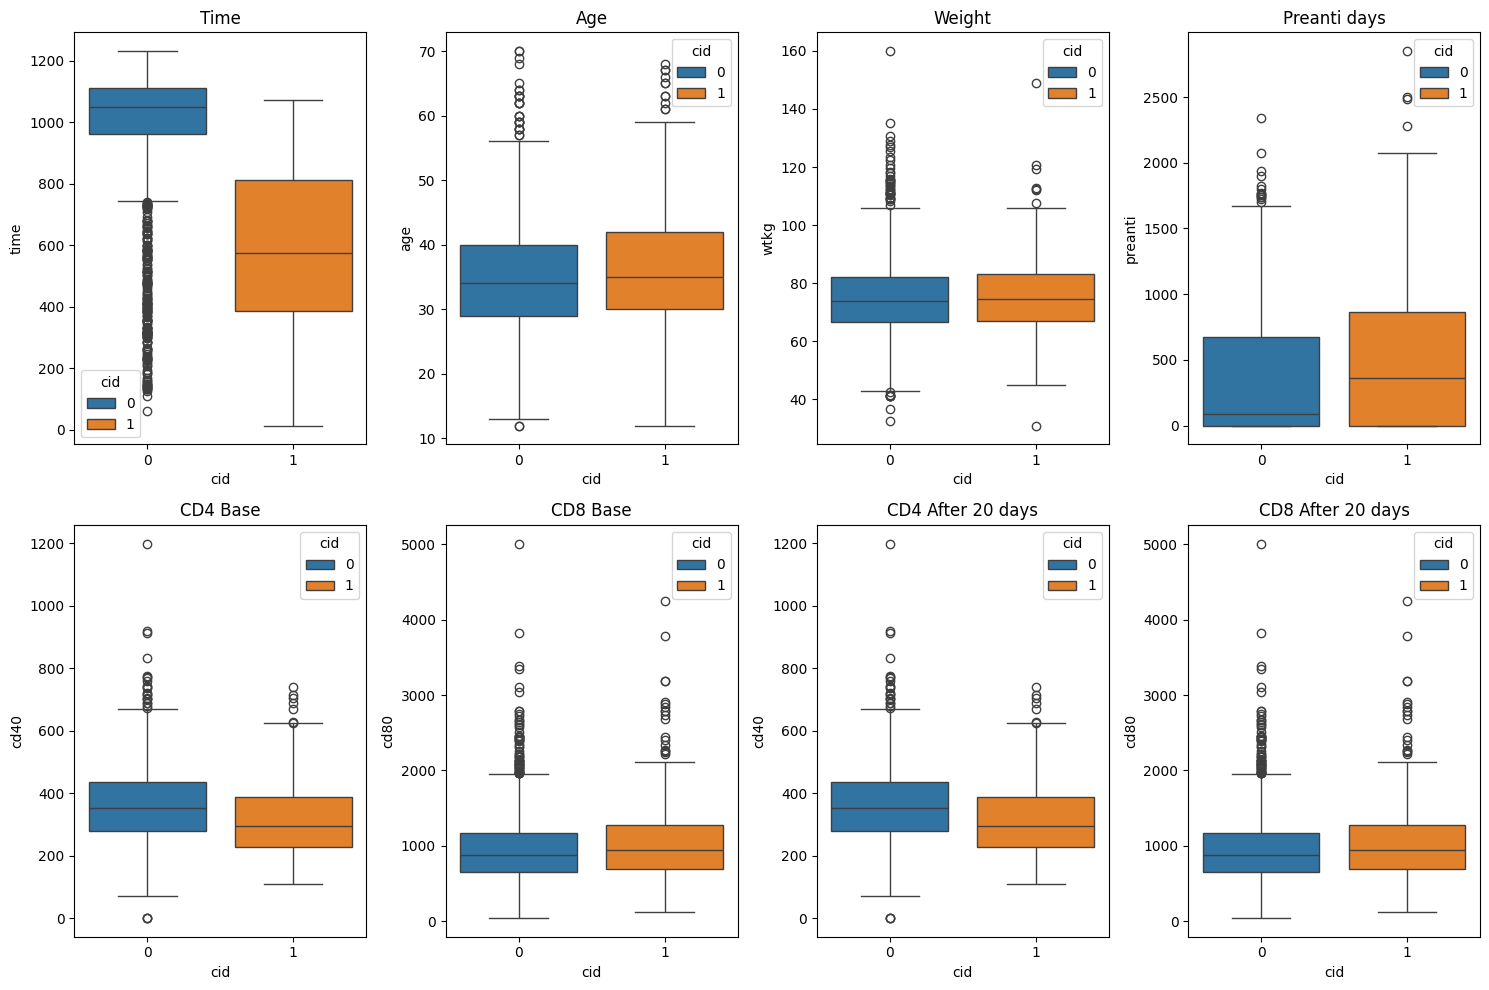

In [12]:
def subplotting(dataframe):
    # Create a subplot with 2 rows and 4 columns (sufficient for 6 plots)
    fig, axes = plt.subplots(2, 4, figsize=(15, 10))  # 2 rows, 4 columns
    axes = axes.flatten()
    
    # Time
    sns.boxplot(data=dataframe, x="cid", y="time", ax=axes[0], hue="cid")
    axes[0].set_title('Time')
    
    # Age
    sns.boxplot(data=dataframe, x="cid", y="age", ax=axes[1], hue="cid")
    axes[1].set_title('Age')
    
    # Weight
    sns.boxplot(data=dataframe, x="cid", y="wtkg", ax=axes[2], hue="cid")
    axes[2].set_title('Weight')
    
    # Number of days having pre-anti treatment
    sns.boxplot(data=dataframe, x="cid", y="preanti", ax=axes[3], hue="cid")
    axes[3].set_title('Preanti days')
    
    # CD4 at Baseline
    sns.boxplot(data=dataframe, x="cid", y="cd40", ax=axes[4], hue="cid")
    axes[4].set_title('CD4 Base')
    
    # CD8 at Baseline
    sns.boxplot(data=dataframe, x="cid", y="cd80", ax=axes[5], hue="cid")
    axes[5].set_title('CD8 Base')

    # CD4 after 20 days
    sns.boxplot(data=dataframe, x="cid", y="cd40", ax=axes[6], hue="cid")
    axes[6].set_title('CD4 After 20 days')
    
    # CD8 after 20 days
    sns.boxplot(data=dataframe, x="cid", y="cd80", ax=axes[7], hue="cid")
    axes[7].set_title('CD8 After 20 days')

    plt.tight_layout()
    plt.show()

subplotting(aids_df)

**Observation:**

* As observed from the Scatterplot evaluation, there is a large number of outliers in class cid = 0, particularly under 800 days.

* Additionally, the continuous columns related to CD4 or CD8 counts also show some count values that deviate significantly from the expected range (According to Hammer et al. (1996), the CD4 count of people with HIV typically ranges from 200 to 500/mm³, while the CD4 count of healthy individuals is between 500 and 1000/mm³). Therefore, the presence of data points with CD4 counts outside this range could potentially be considered outliers.

* Other features like weight and #preanti days also have significant outliers

## Part 2: Data Preprocessing & Feature Engineering – 20%

### 2.2. Data Cleaning

There are 2 biggest data issues in this dataset:
* Outliers in continuous features: time, cd40, cd420, cd80, cd820, age, weight, preanti are found
* Some column names do not have clear meaning

**<u><span style="color:gray;">Remove outliers</span></u>**

In [13]:
def remove_outliers(column, bound_):
    _range = [0, 1]
    bound_range = []
    for i in _range:
        # Calculate the quantiles of the column for cid == i
        Q1 = aids_df[aids_df['cid'] == i][column].quantile(0.25)  # 25th percentile
        Q3 = aids_df[aids_df['cid'] == i][column].quantile(0.75)  # 75th percentile
        
        # Calculate the IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Calculate the lower and upper whisker bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Check if we want to find the min or max value within bounds
        if bound_ == "min":
            # Get the minimum value greater than or equal to the lower bound
            Q0 = aids_df[(aids_df['cid'] == i) & (aids_df[column] >= lower_bound)][column].min()
        elif bound_ == "max":
            # Get the maximum value less than or equal to the upper bound
            Q0 = aids_df[(aids_df['cid'] == i) & (aids_df[column] <= upper_bound)][column].max()
        
        # Append the result to the bound_range list
        bound_range.append(Q0)
    
    return bound_range

# Example usage
print("Outliers of time column may fall below:", remove_outliers("time", "min"))
print("Outliers of preanti column may fall above:", remove_outliers("preanti", "max"))
print("Outliers of cd40 column may fall above:", remove_outliers("cd40", "max"))
print("Outliers of cd80 column may fall above:", remove_outliers("cd80", "max"))
print("Outliers of cd420 column may fall above:", remove_outliers("cd420", "max"))
print("Outliers of cd820 column may fall above:", remove_outliers("cd820", "max"))

Outliers of time column may fall below: [np.int64(744), np.int64(14)]
Outliers of preanti column may fall above: [np.int64(1673), np.int64(2071)]
Outliers of cd40 column may fall above: [np.int64(670), np.int64(623)]
Outliers of cd80 column may fall above: [np.int64(1950), np.int64(2106)]
Outliers of cd420 column may fall above: [np.int64(750), np.int64(559)]
Outliers of cd820 column may fall above: [np.int64(1893), np.int64(1980)]


In [14]:
# Collect indexes of rows to drop based on outlier conditions
time_index_0 = aids_df[(aids_df['time'] < remove_outliers("time", "min")[0]) & (aids_df['cid'] == 0)].index
preanti_index_0 = aids_df[(aids_df['preanti'] > remove_outliers("preanti", "max")[0]) & (aids_df['cid'] == 0)].index
preanti_index_1 = aids_df[(aids_df['preanti'] > remove_outliers("preanti", "max")[0]) & (aids_df['cid'] == 1)].index

cd40_index_0 = aids_df[(aids_df['cd40'] > remove_outliers("cd40", "max")[0]) & (aids_df['cid'] == 0)].index
cd40_index_1 = aids_df[(aids_df['cd40'] > remove_outliers("cd40", "max")[0]) & (aids_df['cid'] == 1)].index

cd420_index_0 = aids_df[(aids_df['cd420'] > remove_outliers("cd420", "max")[0]) & (aids_df['cid'] == 0)].index
cd420_index_1 = aids_df[(aids_df['cd420'] > remove_outliers("cd420", "max")[0]) & (aids_df['cid'] == 1)].index

cd80_index_0 = aids_df[(aids_df['cd80'] > remove_outliers("cd80", "max")[0]) & (aids_df['cid'] == 0)].index
cd80_index_1 = aids_df[(aids_df['cd80'] > remove_outliers("cd80", "max")[0]) & (aids_df['cid'] == 1)].index

cd820_index_0 = aids_df[(aids_df['cd820'] > remove_outliers("cd820", "max")[0]) & (aids_df['cid'] == 0)].index
cd820_index_1 = aids_df[(aids_df['cd820'] > remove_outliers("cd820", "max")[0]) & (aids_df['cid'] == 1)].index

age_index_0 = aids_df[(aids_df['age'] > remove_outliers("age", "max")[0]) & (aids_df['cid'] == 0)].index
age_index_1 = aids_df[(aids_df['age'] > remove_outliers("age", "max")[0]) & (aids_df['cid'] == 1)].index

weight_index_0 = aids_df[(aids_df['wtkg'] > remove_outliers("wtkg", "max")[0]) & (aids_df['cid'] == 0)].index
weight_index_1 = aids_df[(aids_df['wtkg'] > remove_outliers("wtkg", "max")[0]) & (aids_df['cid'] == 1)].index


# Extend rows_to_drop with all the indexes
rows_to_drop = np.concatenate([time_index_0, preanti_index_0, preanti_index_1, cd40_index_0, cd40_index_1,
                               cd420_index_0, cd420_index_1, cd80_index_0, cd80_index_1, cd820_index_0, cd820_index_1,
                              age_index_0, age_index_1, weight_index_0, weight_index_1])

# Convert the result back to a pandas Index (if needed) and print
rows_to_drop_index = pd.Index(rows_to_drop)
aids_df = aids_df.drop(rows_to_drop_index.unique())
aids_df

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,zprior,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
0,948,2,48,89.8128,0,0,0,100,0,0,1,0,0,0,0,1,0,1,0,422,477,566,324,0
3,1166,3,47,85.2768,0,1,0,100,0,1,1,1399,0,1,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,1,1352,0,1,1,3,0,0,0,504,353,870,782,0
5,1181,1,46,88.9056,0,1,1,100,0,1,1,1181,0,1,1,3,0,1,0,235,339,860,1060,0
6,794,0,31,73.0296,0,1,0,100,0,1,1,930,0,1,1,3,0,0,0,244,225,708,699,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,948,1,20,72.4000,1,0,0,100,0,0,1,0,0,0,0,1,0,1,1,483,641,1728,1504,0
2133,1041,2,39,64.8648,1,0,0,90,0,1,1,1042,0,1,1,3,0,1,1,378,401,504,367,1
2134,1091,3,21,53.2980,1,0,0,100,0,1,1,842,0,1,1,3,0,1,1,152,109,561,720,0
2136,1104,2,53,69.8544,1,1,0,90,0,1,1,753,1,1,1,3,0,1,0,419,364,1391,1041,0


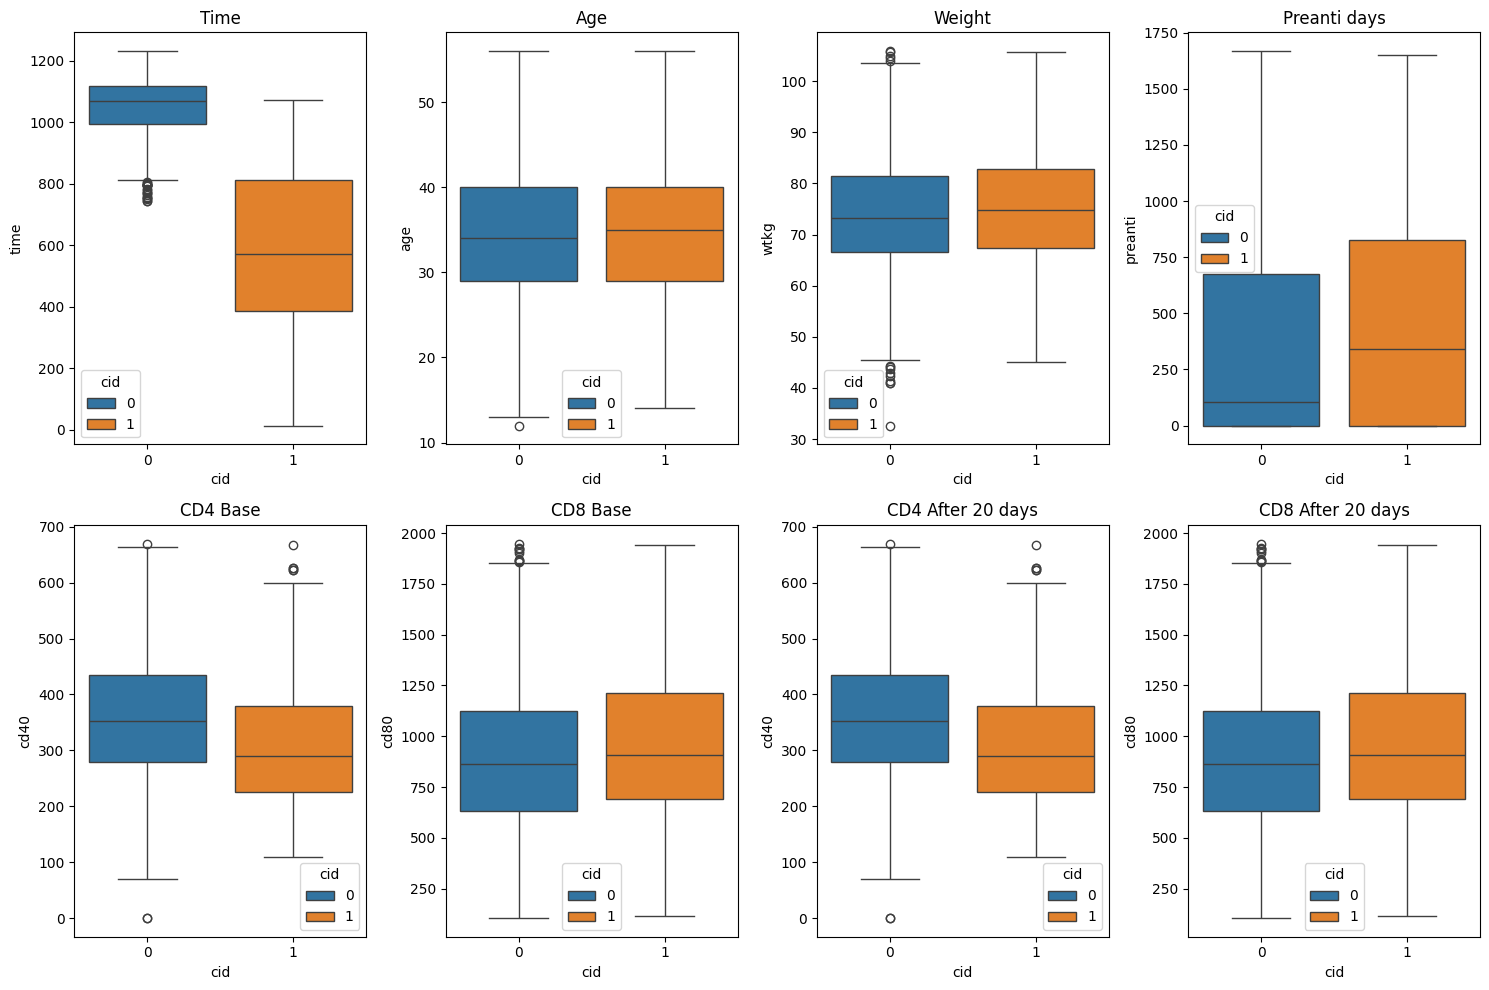

In [15]:
subplotting(aids_df)

**<u><span style="color:gray;">Change column names</span></u>**

In [16]:
aids_df = aids_df.rename(columns={
    'wtkg': 'weight',
    'treat': 'otherTreat',
})
aids_df

,time,trt,age,weight,hemo,homo,drugs,karnof,oprior,z30,zprior,preanti,race,gender,str2,strat,symptom,otherTreat,offtrt,cd40,cd420,cd80,cd820,cid
0,948,2,48,89.8128,0,0,0,100,0,0,1,0,0,0,0,1,0,1,0,422,477,566,324,0
3,1166,3,47,85.2768,0,1,0,100,0,1,1,1399,0,1,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,1,1352,0,1,1,3,0,0,0,504,353,870,782,0
5,1181,1,46,88.9056,0,1,1,100,0,1,1,1181,0,1,1,3,0,1,0,235,339,860,1060,0
6,794,0,31,73.0296,0,1,0,100,0,1,1,930,0,1,1,3,0,0,0,244,225,708,699,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,948,1,20,72.4000,1,0,0,100,0,0,1,0,0,0,0,1,0,1,1,483,641,1728,1504,0
2133,1041,2,39,64.8648,1,0,0,90,0,1,1,1042,0,1,1,3,0,1,1,378,401,504,367,1
2134,1091,3,21,53.2980,1,0,0,100,0,1,1,842,0,1,1,3,0,1,1,152,109,561,720,0
2136,1104,2,53,69.8544,1,1,0,90,0,1,1,753,1,1,1,3,0,1,0,419,364,1391,1041,0


### 2.2. Feature Engineering

**<u><span style="color:gray;">Add column: CD4:CD8</span></u>**

In [17]:
aids_df['cd40/cd80'] = aids_df['cd40']/aids_df['cd80']
aids_df['cd420/cd820'] = aids_df['cd420']/aids_df['cd820']
aids_df['ratio_differences'] = aids_df['cd420/cd820'] - aids_df['cd40/cd80']

**<u><span style="color:gray;">Standardize scale of Strat column</span></u>**

In [18]:
# Thay đổi giá trị trong cột 'strat' từ 1 thành 0
aids_df['strat'] = aids_df['strat'].replace(1, 0)

# Dùng apply để thay đổi giá trị trong cột 'strat'
aids_df['strat'] = aids_df['strat'].apply(lambda x: 1 if x == 2 else (2 if x == 3 else x))

# Xem kết quả
aids_df

,time,trt,age,weight,hemo,homo,drugs,karnof,oprior,z30,zprior,preanti,race,gender,str2,strat,symptom,otherTreat,offtrt,cd40,cd420,cd80,cd820,cid,cd40/cd80,cd420/cd820,ratio_differences
0,948,2,48,89.8128,0,0,0,100,0,0,1,0,0,0,0,0,0,1,0,422,477,566,324,0,0.745583,1.472222,0.726639
3,1166,3,47,85.2768,0,1,0,100,0,1,1,1399,0,1,1,2,0,1,0,287,394,1590,966,0,0.180503,0.407867,0.227364
4,1090,0,43,66.6792,0,1,0,100,0,1,1,1352,0,1,1,2,0,0,0,504,353,870,782,0,0.579310,0.451407,-0.127904
5,1181,1,46,88.9056,0,1,1,100,0,1,1,1181,0,1,1,2,0,1,0,235,339,860,1060,0,0.273256,0.319811,0.046556
6,794,0,31,73.0296,0,1,0,100,0,1,1,930,0,1,1,2,0,0,0,244,225,708,699,1,0.344633,0.321888,-0.022744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,948,1,20,72.4000,1,0,0,100,0,0,1,0,0,0,0,0,0,1,1,483,641,1728,1504,0,0.279514,0.426197,0.146683
2133,1041,2,39,64.8648,1,0,0,90,0,1,1,1042,0,1,1,2,0,1,1,378,401,504,367,1,0.750000,1.092643,0.342643
2134,1091,3,21,53.2980,1,0,0,100,0,1,1,842,0,1,1,2,0,1,1,152,109,561,720,0,0.270945,0.151389,-0.119556
2136,1104,2,53,69.8544,1,1,0,90,0,1,1,753,1,1,1,2,0,1,0,419,364,1391,1041,0,0.301222,0.349664,0.048442


**<u><span style="color:gray;">One-hot Coding for each treatment</span></u>**

In [19]:
aids_df['zdv0'] = aids_df['trt'].apply(lambda x: 1 if x == 0 else 0)
aids_df['zdv_ddl'] = aids_df['trt'].apply(lambda x: 1 if x == 1 else 0)
aids_df['zdv_zal'] = aids_df['trt'].apply(lambda x: 1 if x == 2 else 0)
aids_df['ddl'] = aids_df['trt'].apply(lambda x: 1 if x == 3 else 0)

aids_df

,time,trt,age,weight,hemo,homo,drugs,karnof,oprior,z30,zprior,preanti,race,gender,str2,strat,symptom,otherTreat,offtrt,cd40,cd420,cd80,cd820,cid,cd40/cd80,cd420/cd820,ratio_differences,zdv0,zdv_ddl,zdv_zal,ddl
0,948,2,48,89.8128,0,0,0,100,0,0,1,0,0,0,0,0,0,1,0,422,477,566,324,0,0.745583,1.472222,0.726639,0,0,1,0
3,1166,3,47,85.2768,0,1,0,100,0,1,1,1399,0,1,1,2,0,1,0,287,394,1590,966,0,0.180503,0.407867,0.227364,0,0,0,1
4,1090,0,43,66.6792,0,1,0,100,0,1,1,1352,0,1,1,2,0,0,0,504,353,870,782,0,0.579310,0.451407,-0.127904,1,0,0,0
5,1181,1,46,88.9056,0,1,1,100,0,1,1,1181,0,1,1,2,0,1,0,235,339,860,1060,0,0.273256,0.319811,0.046556,0,1,0,0
6,794,0,31,73.0296,0,1,0,100,0,1,1,930,0,1,1,2,0,0,0,244,225,708,699,1,0.344633,0.321888,-0.022744,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,948,1,20,72.4000,1,0,0,100,0,0,1,0,0,0,0,0,0,1,1,483,641,1728,1504,0,0.279514,0.426197,0.146683,0,1,0,0
2133,1041,2,39,64.8648,1,0,0,90,0,1,1,1042,0,1,1,2,0,1,1,378,401,504,367,1,0.750000,1.092643,0.342643,0,0,1,0
2134,1091,3,21,53.2980,1,0,0,100,0,1,1,842,0,1,1,2,0,1,1,152,109,561,720,0,0.270945,0.151389,-0.119556,0,0,0,1
2136,1104,2,53,69.8544,1,1,0,90,0,1,1,753,1,1,1,2,0,1,0,419,364,1391,1041,0,0.301222,0.349664,0.048442,0,0,1,0


**<u><span style="color:gray;">Drop redundant column</span></u>**

In [20]:
aids_df['zprior'].count()

np.int64(1702)

In [21]:
aids_df = aids_df.drop(columns=["zprior","trt"])
aids_df

,time,age,weight,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,otherTreat,offtrt,cd40,cd420,cd80,cd820,cid,cd40/cd80,cd420/cd820,ratio_differences,zdv0,zdv_ddl,zdv_zal,ddl
0,948,48,89.8128,0,0,0,100,0,0,0,0,0,0,0,0,1,0,422,477,566,324,0,0.745583,1.472222,0.726639,0,0,1,0
3,1166,47,85.2768,0,1,0,100,0,1,1399,0,1,1,2,0,1,0,287,394,1590,966,0,0.180503,0.407867,0.227364,0,0,0,1
4,1090,43,66.6792,0,1,0,100,0,1,1352,0,1,1,2,0,0,0,504,353,870,782,0,0.579310,0.451407,-0.127904,1,0,0,0
5,1181,46,88.9056,0,1,1,100,0,1,1181,0,1,1,2,0,1,0,235,339,860,1060,0,0.273256,0.319811,0.046556,0,1,0,0
6,794,31,73.0296,0,1,0,100,0,1,930,0,1,1,2,0,0,0,244,225,708,699,1,0.344633,0.321888,-0.022744,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,948,20,72.4000,1,0,0,100,0,0,0,0,0,0,0,0,1,1,483,641,1728,1504,0,0.279514,0.426197,0.146683,0,1,0,0
2133,1041,39,64.8648,1,0,0,90,0,1,1042,0,1,1,2,0,1,1,378,401,504,367,1,0.750000,1.092643,0.342643,0,0,1,0
2134,1091,21,53.2980,1,0,0,100,0,1,842,0,1,1,2,0,1,1,152,109,561,720,0,0.270945,0.151389,-0.119556,0,0,0,1
2136,1104,53,69.8544,1,1,0,90,0,1,753,1,1,1,2,0,1,0,419,364,1391,1041,0,0.301222,0.349664,0.048442,0,0,1,0


**<u><span style="color:gray;">Add column: Prior Treatment Ratio</span></u>**

### 2.3. Plotting Correlation

**<u><span style="color:gray;">Correlation between CD4:CD8 Ratio Differences vs. Time to Censoring or Death</span></u>**

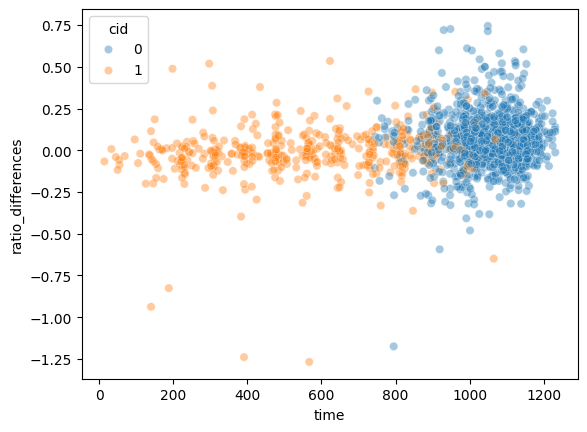

In [22]:
sns.scatterplot(data=aids_df, x="time", y="ratio_differences", hue="cid", alpha=0.4,legend=True)
plt.show()

**<u><span style="color:gray;">Impact of 4 treatments on CID classification and CD4:CD8 ratio</span></u>**

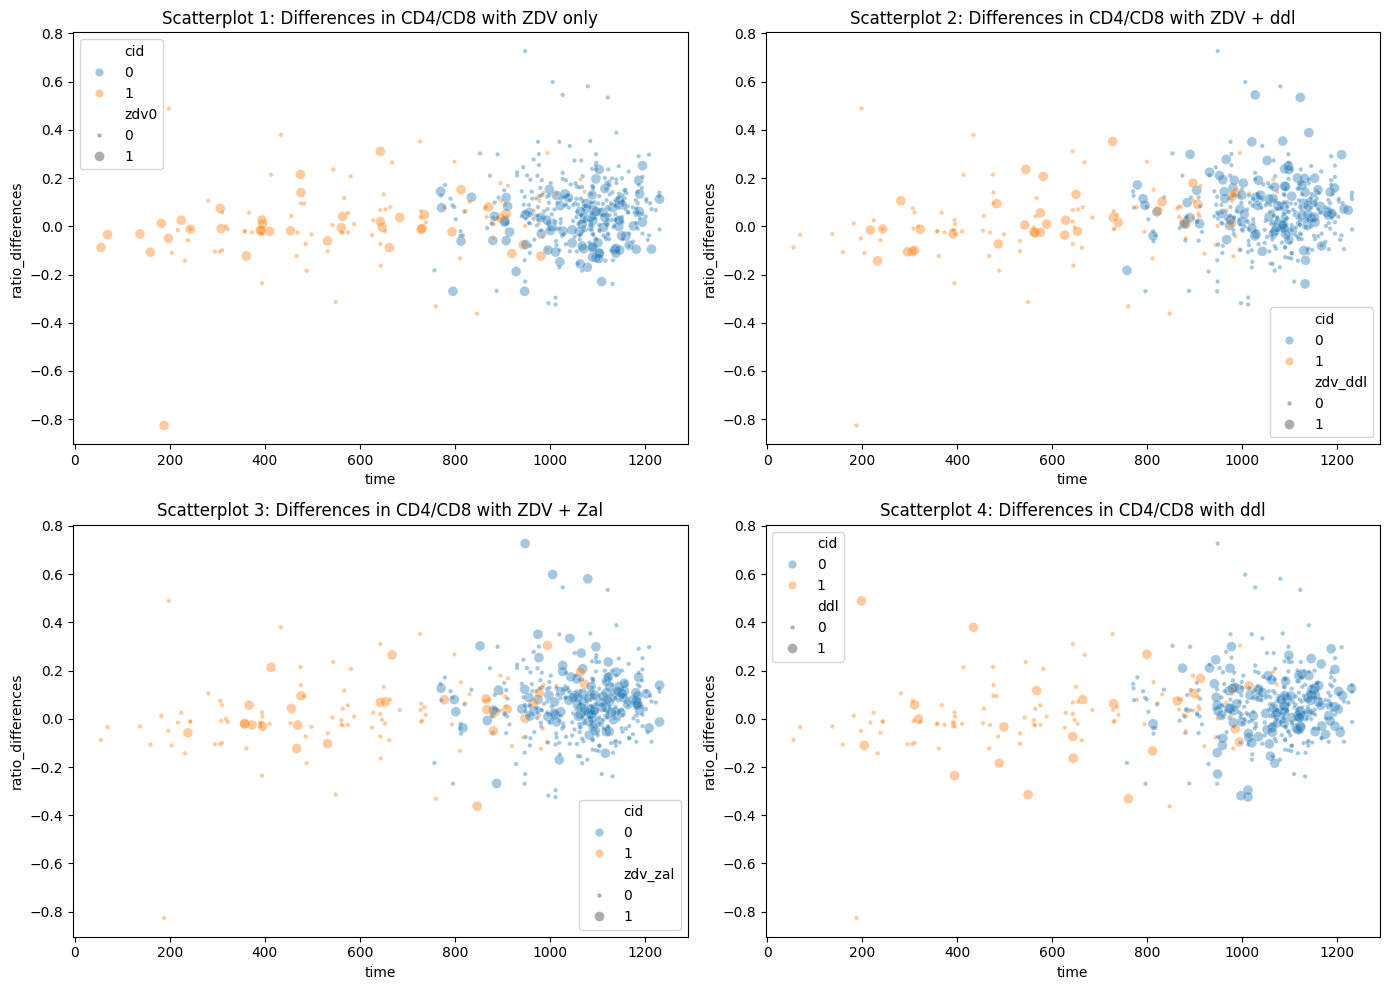

In [23]:
# Tạo một figure với 4 subplots (2 dòng và 2 cột)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Cung cấp dữ liệu cho scatterplot
data = aids_df[:500]

# Vẽ scatterplot đầu tiên ở vị trí (0, 0)
sns.scatterplot(data=data, x="time", y="ratio_differences", hue="cid", size="zdv0", alpha=0.4, sizes=(50, 10), ax=axs[0, 0])
axs[0, 0].set_title("Scatterplot 1: Differences in CD4/CD8 with ZDV only")

# Vẽ scatterplot thứ hai ở vị trí (0, 1)
sns.scatterplot(data=data, x="time", y="ratio_differences", hue="cid", size="zdv_ddl", alpha=0.4, sizes=(50, 10), ax=axs[0, 1])
axs[0, 1].set_title("Scatterplot 2: Differences in CD4/CD8 with ZDV + ddl")

# Vẽ scatterplot thứ ba ở vị trí (1, 0)
sns.scatterplot(data=data, x="time", y="ratio_differences", hue="cid", size="zdv_zal", alpha=0.4, sizes=(50, 10), ax=axs[1, 0])
axs[1, 0].set_title("Scatterplot 3: Differences in CD4/CD8 with ZDV + Zal")

# Vẽ scatterplot thứ tư ở vị trí (1, 1)
sns.scatterplot(data=data, x="time", y="ratio_differences", hue="cid", size="ddl", alpha=0.4, sizes=(50, 10), ax=axs[1, 1])
axs[1, 1].set_title("Scatterplot 4: Differences in CD4/CD8 with ddl")

# Điều chỉnh khoảng cách giữa các subplots
plt.tight_layout()

# Hiển thị plot
plt.show()

In [24]:
# Group by 'cid' and calculate the count of 1's in each treatment column for each cid group
treatment_counts = aids_df.groupby('cid')[['zdv0', 'zdv_ddl', 'zdv_zal', 'ddl']].sum()

# Calculate the total number of patients in each 'cid' group (for cid = 0 and cid = 1)
cid_totals = aids_df.groupby('cid').size()

# Calculate the ratio of each 'cid' in each treatment by dividing the count by the total number of patients in each 'cid' group
treatment_ratios = treatment_counts.divide(cid_totals, axis=0)

# Display the result
treatment_ratios

,zdv0,zdv_ddl,zdv_zal,ddl
cid,,,,
0,0.209265,0.250799,0.265176,0.27476
1,0.346667,0.202222,0.211111,0.24000


**<u><span style="color:gray;">Impact of Treatment History on CID classification and CD4:CD8 ratio</span></u>**

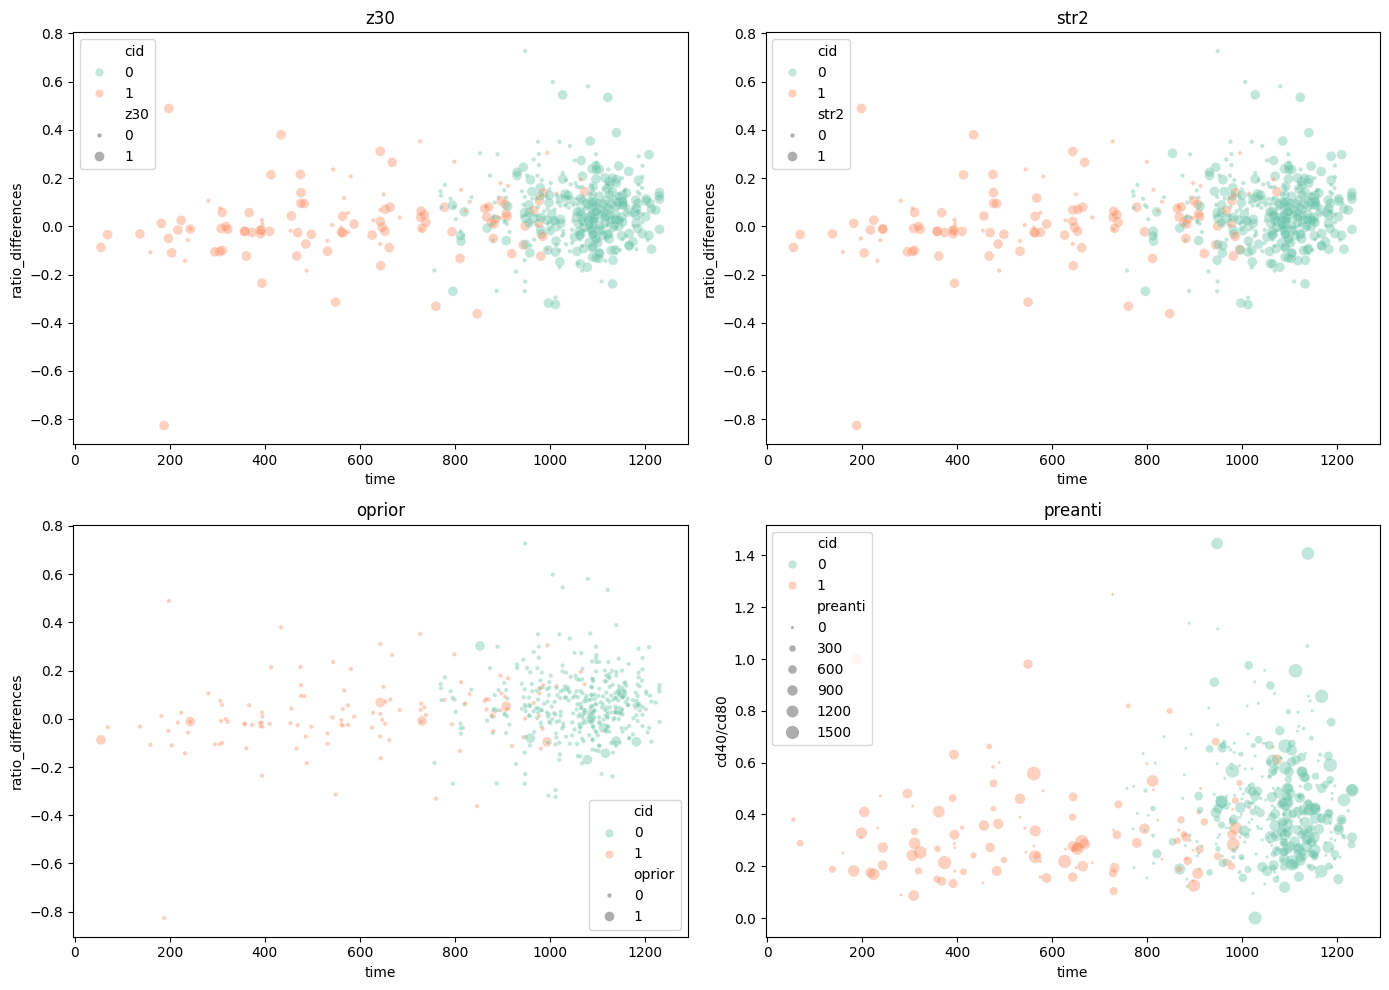

In [25]:
# Tạo một figure với 4 subplots (2 dòng và 2 cột)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Cung cấp dữ liệu cho scatterplot
data = aids_df[:500]

# Vẽ scatterplot đầu tiên ở vị trí (0, 0)
sns.scatterplot(data=data, x="time", y="ratio_differences", hue="cid", size="z30", alpha=0.4, sizes=(50, 10), ax=axs[0, 0], palette="Set2")
axs[0, 0].set_title("z30")

# Vẽ scatterplot thứ hai ở vị trí (0, 1)
sns.scatterplot(data=data, x="time", y="ratio_differences", hue="cid", size="str2", alpha=0.4, sizes=(50, 10), ax=axs[0, 1], palette="Set2")
axs[0, 1].set_title("str2")

# Vẽ scatterplot thứ ba ở vị trí (1, 0)
sns.scatterplot(data=data, x="time", y="ratio_differences", hue="cid", size="oprior", alpha=0.4, sizes=(50, 10), ax=axs[1, 0], palette="Set2")
axs[1, 0].set_title("oprior")

# Vẽ scatterplot thứ tư ở vị trí (1, 1)
sns.scatterplot(data=data, x="time", y="cd40/cd80", hue="cid", size="preanti", alpha=0.4, sizes=(5, 100), ax=axs[1, 1], palette="Set2")
axs[1, 1].set_title("preanti")

# Điều chỉnh khoảng cách giữa các subplots
plt.tight_layout()

# Hiển thị plot
plt.show()

In [26]:
# Group by 'cid' and calculate the count of 1's in each treatment column for each cid group
history_counts = aids_df.groupby('cid')[['z30','str2','oprior']].sum()

# Calculate the total number of patients in each 'cid' group (for cid = 0 and cid = 1)
cid_totals_history = aids_df.groupby('cid').size()

# Calculate the ratio of each 'cid' in each treatment by dividing the count by the total number of patients in each 'cid' group
history_ratios = history_counts.divide(cid_totals_history, axis=0)

# Display the result
history_ratios

,z30,str2,oprior
cid,,,
0,0.525559,0.563099,0.019968
1,0.660000,0.695556,0.035556


In [27]:
# Group by 'cid' and calculate the count of 1's in each treatment column for each cid group
history_counts = aids_df.groupby('cid')[['z30','str2','oprior']].sum() / aids_df.shape[0]

history_counts

,z30,str2,oprior
cid,,,
0,0.386604,0.414219,0.014689
1,0.174501,0.183901,0.009401


In [28]:
aids_df.groupby("cid")['preanti'].mean()

cid
0    348.067093
1    448.166667
Name: preanti, dtype: float64

**<u><span style="color:gray;">Impact of Demographics & Medical History on CID classification and CD4:CD8 ratio</span></u>**

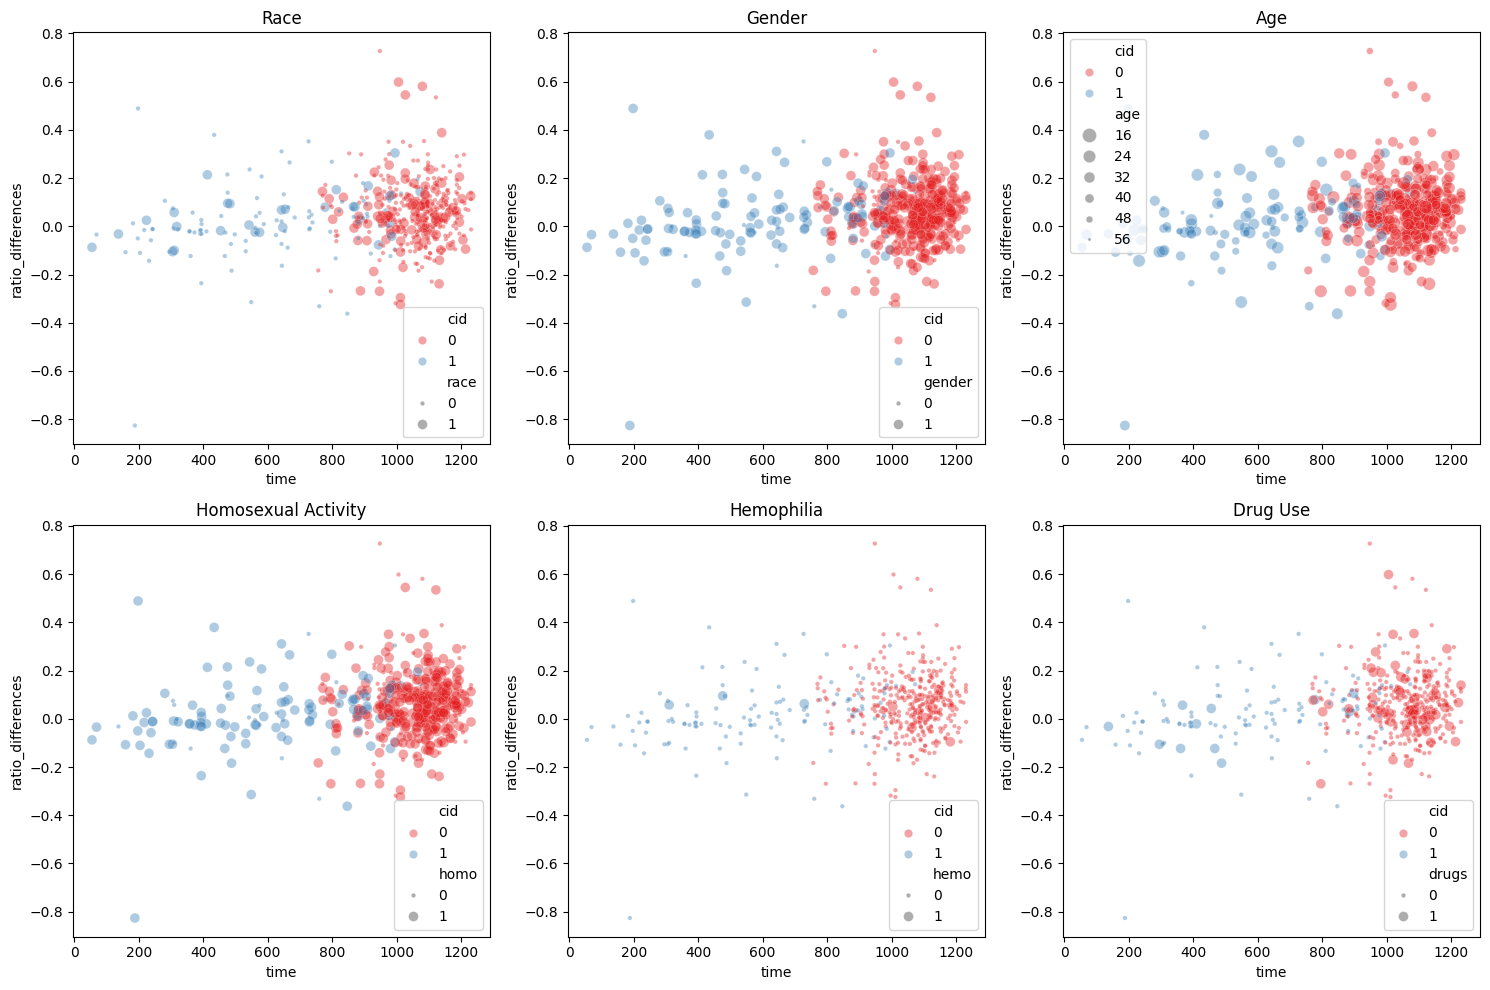

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo một figure với 6 subplots (2 dòng và 3 cột)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Cung cấp dữ liệu cho scatterplot
data = aids_df[:500]

# Vẽ scatterplot đầu tiên ở vị trí (0, 0)
sns.scatterplot(data=data, x="time", y="ratio_differences", hue="cid", size="race", alpha=0.4, sizes=(50, 10), ax=axs[0, 0], palette="Set1")
axs[0, 0].set_title("Race")

# Vẽ scatterplot thứ hai ở vị trí (0, 1)
sns.scatterplot(data=data, x="time", y="ratio_differences", hue="cid", size="gender", alpha=0.4, sizes=(50, 10), ax=axs[0, 1], palette="Set1")
axs[0, 1].set_title("Gender")

# Vẽ scatterplot thứ ba ở vị trí (0, 2)
sns.scatterplot(data=data, x="time", y="ratio_differences", hue="cid", size="age", alpha=0.4, sizes=(100, 5), ax=axs[0, 2], palette="Set1")
axs[0, 2].set_title("Age")

# Vẽ scatterplot thứ tư ở vị trí (1, 0)
sns.scatterplot(data=data, x="time", y="ratio_differences", hue="cid", size="homo", alpha=0.4, sizes=(50, 10), ax=axs[1, 0], palette="Set1")
axs[1, 0].set_title("Homosexual Activity")

# Vẽ scatterplot thứ năm ở vị trí (1, 1)
sns.scatterplot(data=data, x="time", y="ratio_differences", hue="cid", size="hemo", alpha=0.4, sizes=(50, 10), ax=axs[1, 1], palette="Set1")
axs[1, 1].set_title("Hemophilia")

# Vẽ scatterplot thứ sáu ở vị trí (1, 2)
sns.scatterplot(data=data, x="time", y="ratio_differences", hue="cid", size="drugs", alpha=0.4, sizes=(50, 10), ax=axs[1, 2], palette="Set1")
axs[1, 2].set_title("Drug Use")

# Điều chỉnh khoảng cách giữa các subplots
plt.tight_layout()

# Hiển thị plot
plt.show()


**<u><span style="color:gray;">Feature selection</span></u>**

According to the research topic of the dataset, it was collected to evaluate the performance of four AIDS treatment methods:

1. ZDV Only (zdv0)
2. ZDV + ddl (zdv_ddl)
3. ZDV + Zal
4. ddl

However, as analyzed in the treatment ratio below, it can be seen that, aside from zdv0, the other three treatments have relatively similar rates of censored cases and deaths. This suggests that there is no clear difference between the three treatments in this dataset. Therefore, incorporating all these treatments into a classification model for predicting who is likely to survive longer is challenging.

However, it is evident that, compared to the other three treatments, using only zdv0 shows a significant difference, with a higher number of CID = 1 (deaths) compared to the other treatments, and a lower survival rate. Although the correlation of zdv0 to CID is not very high compared to other features, it could potentially be valuable when compared with other treatments, especially if additional datasets are available in the future.

In [30]:
treatment_ratios

,zdv0,zdv_ddl,zdv_zal,ddl
cid,,,,
0,0.209265,0.250799,0.265176,0.27476
1,0.346667,0.202222,0.211111,0.24000


Returning to the final question for this data science project: What is the final question?

If the goal is to evaluate the performance of the experimental treatments as stated in the original task, it is clear that, as a non-primary researcher, there is still insufficient information about the dataset (e.g., whether drug intake is continuous, which cases represent death vs. treatment abandonment, etc.). Therefore, this question would not be effective in this context.

On the other hand, there are several features that are valuable for classification to address the question: Which patients, treated during the observation period, will die (CID = 1)? For example, features like **time, cd420 with a correlation to CID over 0.35**, and the **ratio differences indicate slight changes** in CID = 1 versus CID = 0 (suggesting that patients who die may experience a near-zero immune cell count, while CID = 0 patients show higher changes). 

Furthermore, based on data visualization, other factors like medical history and demographics do not significantly impact the classification of the two groups.

Thus, for training models, the following features—***time, cd420, ratio_differences, and zdv0—will*** be used to develop a model to avoid overfitting and ensure better generalization, as well as answer the question: ***Which patients are likely to die within the observation time range (135 weeks - 147 weeks)?***

## Part 3 Train Classification Models with Scikit-Learn – 20%

In [31]:
# Giả sử aids_df là DataFrame đã được tải sẵn
X = aids_df[["time", "cd420","ratio_differences","zdv0"]]
y = aids_df['cid']

In [32]:
aids_df['cid'].value_counts(normalize=True) * 100

cid
0    73.560517
1    26.439483
Name: proportion, dtype: float64

**<u><span style="color:gray;">Standardization</span></u>**

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

**<u><span style="color:gray;">Split data & Training functions</span></u>**

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluation_metrics(model, X_test, y_test):
    prediction = model.predict(X_test)
    
    accuracy_ = accuracy_score(y_test, prediction)
    precision_ = precision_score(y_test, prediction)
    recall_ = recall_score(y_test, prediction)
    f1_ = f1_score(y_test, prediction)
    
    return accuracy_, precision_, recall_, f1_
    

foldLoop = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
def model_training(model, X, y):
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    
    for fold, (train_index, test_index) in enumerate(foldLoop.split(X, y)):
        X_train = X.iloc[train_index]
        X_test = X.iloc[test_index]
        y_train = y.iloc[train_index]
        y_test = y.iloc[test_index]

        model.fit(X_train, y_train)
        accuracy_, precision_, recall_, f1_ = evaluation_metrics(model, X_test, y_test)
        
        accuracy_list.append(accuracy_)
        precision_list.append(precision_)
        recall_list.append(recall_)
        f1_list.append(f1_)
    avg_accuracy = sum(accuracy_list) / len(accuracy_list)
    avg_precision = sum(precision_list) / len(precision_list)
    avg_recall = sum(recall_list) / len(recall_list)
    avg_f1 = sum(f1_list) / len(f1_list)

    return avg_accuracy, avg_precision, avg_recall, avg_f1

def print_results(accuracy, precision, recall, f1):
    print("Best accuracy:", accuracy)
    print("Best precision:", precision)
    print("Best recall:", recall)
    print("Best f1:", f1)

### 3.1. Logistics Regression

In [35]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(class_weight="balanced", random_state=42, max_iter=200)

log_accuracy, log_precision, log_recall, log_f1 = model_training(log_model, X, y)

print_results(log_accuracy, log_precision, log_recall, log_f1)

Best accuracy: 0.9195046824154806
Best precision: 0.8242676246059464
Best recall: 0.8844444444444445
Best f1: 0.8532245145349151


### 3.2. Support Vector Machine (SVM)

**<u><span style="color:gray;">RBF Kernel SVM</span></u>**

In [36]:
from sklearn.svm import SVC

rbf_model = SVC(kernel="rbf", gamma='scale', class_weight = "balanced")
rbf_accuracy, rbf_precision, rbf_recall, rbf_f1 = model_training(rbf_model, X, y)

print_results(rbf_accuracy, rbf_precision, rbf_recall, rbf_f1)

Best accuracy: 0.9218541702892251
Best precision: 0.83146737275901
Best recall: 0.8844444444444445
Best f1: 0.856901067811967


In [37]:
def create_empty_dict():
    accuracy_dict = {}
    precision_dict = {}
    recall_dict = {}
    f1_dict = {}
    return accuracy_dict, precision_dict, recall_dict, f1_dict

def best_metrics(a_dict, p_dict, r_dict, f1_dict):
    
    best_accuracy_degree = max(a_dict, key=a_dict.get)
    best_precision_degree = max(p_dict, key=p_dict.get)
    best_recall_degree = max(r_dict, key=r_dict.get)
    best_f1_degree = max(f1_dict, key=f1_dict.get)

    best_accuracy_value = a_dict[best_accuracy_degree]
    best_precision_value = p_dict[best_precision_degree]
    best_recall_value = r_dict[best_recall_degree]
    best_f1_value = f1_dict[best_f1_degree]

    return (best_accuracy_degree, best_accuracy_value),(best_precision_degree, best_precision_value), (best_recall_degree, best_recall_value), (best_f1_degree, best_f1_value)

In [38]:
from sklearn.svm import SVC

degree_range = [2,3,4,5]

poly_accuracy_dict, poly_precision_dict, poly_recall_dict, poly_f1_dict = create_empty_dict()

for i in degree_range:
    poly_model = SVC(kernel="poly", degree=i, gamma='scale',class_weight="balanced")
    poly_accuracy, poly_precision, poly_recall, poly_f1 = model_training(poly_model, X, y)
    
    poly_accuracy_dict[i] = poly_accuracy
    poly_precision_dict[i] = poly_precision
    poly_recall_dict[i] = poly_recall
    poly_f1_dict[i] = poly_f1

poly_best_accuracy, poly_best_precision, poly_best_recall, poly_best_f1 = best_metrics(poly_accuracy_dict, poly_precision_dict, poly_recall_dict, poly_f1_dict)

print_results(poly_best_accuracy, poly_best_precision, poly_best_recall, poly_best_f1)

Best accuracy: (2, 0.9206814963857216)
Best precision: (2, 0.820922419916483)
Best recall: (5, 0.9022222222222221)
Best f1: (2, 0.8565671273756325)


### 3.3. K-Nearest Neighbors (KNN)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(2,12,2)

knn_accuracy_dict, knn_precision_dict, knn_recall_dict, knn_f1_dict = create_empty_dict()

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn_accuracy, knn_precision, knn_recall, knn_f1 = model_training(knn, X, y)

    knn_accuracy_dict[i] = knn_accuracy
    knn_precision_dict[i] = knn_precision
    knn_recall_dict[i] = knn_recall
    knn_f1_dict[i] = knn_f1

knn_best_accuracy, knn_best_precision, knn_best_recall, knn_best_f1 = best_metrics(knn_accuracy_dict, knn_precision_dict, knn_recall_dict, knn_f1_dict)

print_results(knn_best_accuracy, knn_best_precision, knn_best_recall, knn_best_f1)

Best accuracy: (4, 0.9306673373574782)
Best precision: (6, 0.9397163550696511)
Best recall: (4, 0.7911111111111112)
Best f1: (4, 0.8577708707712309)


### 3.3. Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

tree_model = DecisionTreeClassifier(criterion="entropy", class_weight="balanced")
tree_accuracy, tree_precision, tree_recall, tree_f1 = model_training(tree_model, X, y)

print_results(tree_accuracy, tree_precision, tree_recall, tree_f1)

Best accuracy: 0.8960098036780352
Best precision: 0.8044179176967511
Best recall: 0.8022222222222223
Best f1: 0.8031864078843945


## Part 4 Model Evaluation and Comparison – 40%

In this section, I chose Precision, Recall, and F1 instead of a fixed metric. The goal of this project is to find the most usable predictive model, which can:

1. Be applied in medical diagnostics to predict whether a patient will die before the observation time.
2. Serve as a tool for comparing the effectiveness of the ZDV-only treatment to other treatments, especially with additional future research data.

The importance order of metrics is: Recall >> F1 >> Precision because:

* Accuracy is unreliable with imbalanced data.
* Recall is most important because it’s critical not to miss actual deaths for diagnostics purpose. Missing a true death is far more problematic than incorrectly predicting someone will die who later survives.
* F1 is second in importance to balance Recall and Precision. A high Recall with low Precision would result in missing many surviving patients, leading to biased treatment assessments if the model is expanded later.
* The dataset isn't clearly separable, though it shows a linear trend, so F1 scores across models don't vary much. Evaluating additional metrics is necessary for a comprehensive view.

In [41]:
comparison = {
    'Models': ['Logistic Regression', 'RBF Kernel', 'PolynomiaL Kernel', 'KNN', 'Decision Tree'],
    'Precision': [log_precision, rbf_precision, poly_best_precision, knn_best_precision, tree_precision],
    'Recall': [log_recall, rbf_recall, poly_best_recall, knn_best_recall, tree_recall],
    'F1': [log_f1, rbf_f1, poly_best_f1, knn_best_f1, tree_f1 ]
}

df_comparison = pd.DataFrame(comparison)
df_comparison

,Models,Precision,Recall,F1
0,Logistic Regression,0.824268,0.884444,0.853225
1,RBF Kernel,0.831467,0.884444,0.856901
2,PolynomiaL Kernel,"(2, 0.820922419916483)","(5, 0.9022222222222221)","(2, 0.8565671273756325)"
3,KNN,"(6, 0.9397163550696511)","(4, 0.7911111111111112)","(4, 0.8577708707712309)"
4,Decision Tree,0.804418,0.802222,0.803186


**Final Observation:**

Based on the evaluation metrics, the following conclusions can be drawn:

* RBF Kernel is the most generalized and stable model, as it consistently achieves high or second-highest results in Precision, Recall, and F1. It has the best usability due to its flexibility and adaptability, especially if the dataset trends change over time.
* Logistic Regression has slight differences in Precision and F1, but RBF is still the preferred choice because it is more flexible and can adapt to changing data trends. Logistic Regression, with its linear boundary, lacks this adaptability.
* Decision Tree is the most unreliable model, with generally poor metrics across the board compared to the others.

While Polynomial Kernel and KNN don't perform exceptionally well in terms of Recall and F1, their metric differences from RBF and Logistic Regression are not large. However:

- KNN: KNN is highly sensitive to noise, especially when k is too small. It tends to classify most instances as CID=0 (survive), even if they should belong to CID=1 (death). This bias towards the majority class results in high precision but low recall for the minority class. Therefore, Recall and F1 should be prioritized to prevent KNN from being affected by outliers. 
- Polynomial Kernel: With Polynomial Kernel, overfitting can occur if the polynomial degree is too high. It also tends to favor the majority class (CID=0), which may lead to high precision but low recall for CID=1. Thus, Recall and F1 should be emphasized to mitigate the impact of outliers and ensure balanced predictions.
- Decision Tree: Since 3/4 of the features are continuous, Decision Tree may struggle to make accurate splits. If not pruned properly, it can result in incorrect thresholds, increasing false positives and reducing precision. Given the high presence of outliers in this dataset, Precision should be prioritized to ensure accurate boundary splits.